In [1]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')


pandas_profiling.ProfileReport(retail_raw)

NameError: name 'pandas_profiling' is not defined

In [3]:
import pandas as pd
import numpy as np
import io

retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR)) | (retail_raw['quantity'] > (Q3 + 1.5*IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


In [12]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

print(retail_raw.duplicated())

# Buang data yang terduplikasi

retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)


Shape awal:  (5000, 9)
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool
Shape akhir:  (4993, 9)


In [8]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


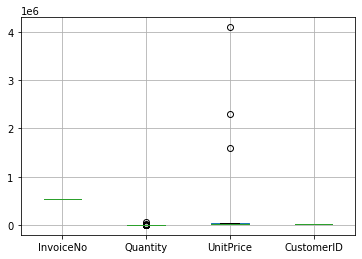

In [2]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling
import matplotlib.pyplot as plt

uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [21]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5*IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))
print(uncleaned_raw.shape)
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()
print(uncleaned_raw.shape)

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
(505, 7)
(32, 7)
